In [1]:
import os
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


constants = imp.load_source('constants', '../src/constants.py')
nTrain = constants.nTrain
nVal = constants.nVal
nTest = constants.nTest

%matplotlib inline

In [2]:
Xtrain = np.load('../data/features/openai_train.npz')['arr_0'].reshape(-1,1)
Xval = np.load('../data/features/openai_val.npz')['arr_0'].reshape(-1,1)
Xtest = np.load('../data/features/openai_test.npz')['arr_0'].reshape(-1,1)

In [3]:
train = pd.read_csv('../data/train.csv',sep=';',index_col=0)
val = pd.read_csv('../data/val.csv',sep=';',index_col=0)
test = pd.read_csv('../data/test.csv',sep=';',index_col=0)
ytrain = train['sentiment'].values
yval = val['sentiment'].values
ytest = test['sentiment'].values

In [8]:
train['text'].iloc[-19]

'@united Hmmm...seems like this could be something to be changed to be more #flyerfriendly.'

In [33]:
train.to_csv('../data/ulmfit_train.csv',sep=',',header=False,index=False)
val.to_csv('../data/ulmfit_val.csv',sep=',',header=False,index=False)
test.to_csv('../data/ulmfit_test.csv',sep=',',header=False,index=False)

In [9]:
from sklearn.linear_model import LogisticRegressionCV
classifier = LogisticRegressionCV()

In [22]:
pd.crosstab?

In [24]:
classifier.fit(Xtrain,ytrain)
ypreds = classifier.predict(Xval)
np.mean(ypreds == yval)
ypreds
a = pd.DataFrame(np.array([ypreds,yval]).T,columns=['pred','actual'])
pd.crosstab(a['pred'],a['actual'])

actual,-1,0,1
pred,,,
-1,1158,395,106
1,40,73,228


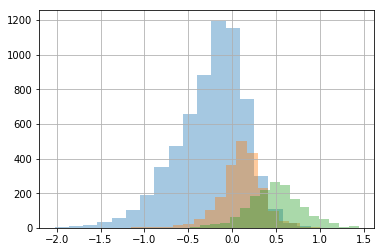

In [36]:
pd.Series(Xtrain[ytrain == -1].flatten()).hist(alpha=0.4,bins=20)
pd.Series(Xtrain[ytrain == 0].flatten()).hist(alpha=0.4,bins=20)
pd.Series(Xtrain[ytrain == 1].flatten()).hist(alpha=0.4,bins=20)

In [11]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(classifier.predict(Xval), yval)

c:\users\rob\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(array([0.96661102, 0.        , 0.68263473]),
 array([0.69801085, 0.        , 0.6686217 ]),
 array([0.81064053, 0.        , 0.67555556]),
 array([1659,    0,  341], dtype=int64))

In [30]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(Xtrain,ytrain)
np.mean(classifier.predict(Xtrain) == ytrain)

0.7186